Training Models...

✅ Logistic Regression Trained. Accuracy: 0.9831
✅ SVM Trained. Accuracy: 0.9492
✅ Naive Bayes Trained. Accuracy: 0.9322
✅ Random Forest Trained. Accuracy: 0.9661
✅ KNN Trained. Accuracy: 0.8983
✅ Decision Tree Trained. Accuracy: 0.8644

--- MODEL PERFORMANCE ---
                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.983051  1.000000
3        Random Forest  0.966102  0.990783
1                  SVM  0.949153  0.998848
2          Naive Bayes  0.932203  0.976959
4                  KNN  0.898305  0.972350
5        Decision Tree  0.864407  0.865783


C:\Users\muham\AppData\Local\Temp\ipykernel_7712\1706072447.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


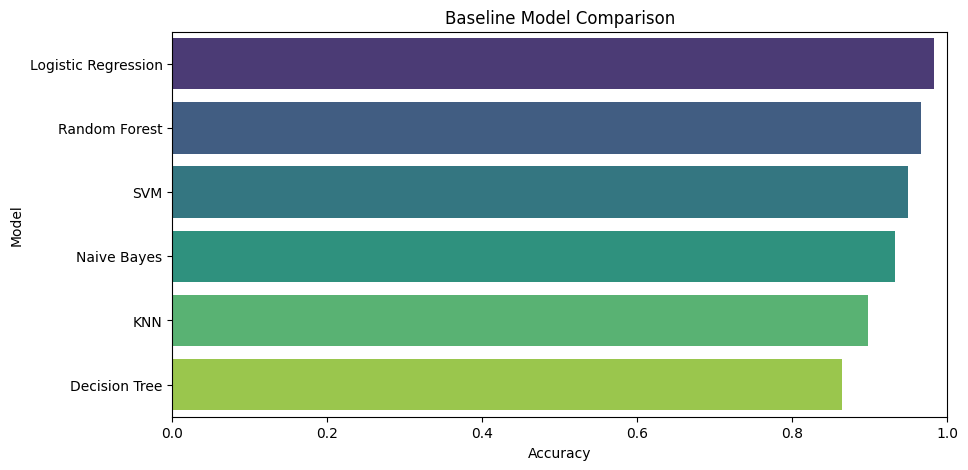

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 1. Load Data
df = pd.read_csv('../data/clean/autism_screening_encoded.csv')

# 2. Define X (Features) and y (Target)
# CRITICAL: Drop 'class' (Target)
X = df.drop(['class'], axis=1) 
y = df['class']

# 3. Split Data (80% Train, 20% Test)
# Stratify=y ensures we have the same % of autism cases in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Define Models to Compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True), # probability=True needed for ROC-AUC
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# 5. Train and Evaluate
results = []

print("Training Models...\n")
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 0
    
    results.append({"Model": name, "Accuracy": acc, "ROC-AUC": auc})
    
    print(f"✅ {name} Trained. Accuracy: {acc:.4f}")

# 6. Show Comparison Table
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n--- MODEL PERFORMANCE ---")
print(results_df)

# 7. Visualize Results
plt.figure(figsize=(10, 5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Baseline Model Comparison")
plt.xlim(0, 1.0)
plt.show()

# Baseline Models - IMPROVED with Feature Scaling

## ⚠️ Why Current Results Might Be Misleading:

1. **Missing Feature Scaling**: Distance-based models (KNN, SVM, Logistic Regression) need scaled features
2. **Perfect ROC-AUC (1.0)**: Suspicious! Could indicate:
   - Data leakage (check if 'result' column was dropped)
   - Overfitting on small test set
   - Need cross-validation

## 📊 Which Models Need What:

| Model | Needs Scaling? | Why? |
|-------|---------------|------|
| Logistic Regression | ✅ YES | Sensitive to feature magnitudes |
| SVM | ✅ YES | Distance-based algorithm |
| KNN | ✅ YES | Distance-based (worst performer without scaling!) |
| Random Forest | ❌ NO | Tree-based, scale-invariant |
| Decision Tree | ❌ NO | Tree-based, scale-invariant |
| Naive Bayes | ❌ NO | Probability-based |

## 🔧 Solution: Use Proper Scaling Pipeline


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# 1. Load Data
df = pd.read_csv('../data/clean/autism_screening_encoded.csv')

print("="*80)
print("DATA LOADING AND VERIFICATION")
print("="*80)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# CRITICAL: Check for data leakage
if 'result' in df.columns:
    print("\n⚠️ WARNING: 'result' column found - DATA LEAKAGE DETECTED!")
    print("Please re-run encoding notebook to drop this column.")
else:
    print("\n✅ Good: No 'result' column found - no data leakage")

# 2. Define X (Features) and y (Target)
X = df.drop(['class'], axis=1) 
y = df['class']

print(f"\nFeatures shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# 3. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# 4. Feature Scaling (for distance-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Feature scaling applied (StandardScaler)")
print(f"Scaled features - Mean: {X_train_scaled.mean():.4f}, Std: {X_train_scaled.std():.4f}")

DATA LOADING AND VERIFICATION
Dataset shape: (292, 21)
Columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'jaundice', 'autism', 'class', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Middle Eastern', 'ethnicity_Others', 'ethnicity_South Asian', 'ethnicity_White-European']

✅ Good: No 'result' column found - no data leakage

Features shape: (292, 20)
Target distribution:
class
0    151
1    141
Name: count, dtype: int64

Train set: 233 samples
Test set: 59 samples

✅ Feature scaling applied (StandardScaler)
Scaled features - Mean: -0.0000, Std: 1.0000


# Train Models with Proper Data Handling


In [6]:
# Define models with their data requirements
models_scaled = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, random_state=42)
}

models_unscaled = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

results = []

print("="*80)
print("TRAINING MODELS WITH PROPER SCALING")
print("="*80)

# Train models that NEED scaling
print("\n--- MODELS WITH SCALED DATA ---")
for name, model in models_scaled.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    # Cross-validation for more reliable estimate
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    results.append({
        "Model": name, 
        "Accuracy": acc, 
        "ROC-AUC": auc,
        "CV Mean": cv_scores.mean(),
        "CV Std": cv_scores.std(),
        "Scaling": "Yes"
    })
    
    print(f"✅ {name}")
    print(f"   Test Accuracy: {acc:.4f}")
    print(f"   ROC-AUC: {auc:.4f}")
    print(f"   CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Train models that DON'T need scaling
print("\n--- MODELS WITH UNSCALED DATA ---")
for name, model in models_unscaled.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    results.append({
        "Model": name, 
        "Accuracy": acc, 
        "ROC-AUC": auc,
        "CV Mean": cv_scores.mean(),
        "CV Std": cv_scores.std(),
        "Scaling": "No"
    })
    
    print(f"✅ {name}")
    print(f"   Test Accuracy: {acc:.4f}")
    print(f"   ROC-AUC: {auc:.4f}")
    print(f"   CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Show comprehensive results
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(results_df.to_string(index=False))

print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)
print("- CV Mean: Average accuracy across 5-fold cross-validation")
print("- CV Std: Standard deviation (lower = more stable)")
print("- Look for models with high accuracy AND low CV Std")
print("- If Test Accuracy >> CV Mean: possible overfitting")
print("- If ROC-AUC = 1.0: CHECK FOR DATA LEAKAGE!")
print("\nNEURAL NETWORK NOTE:")
print("- MLPClassifier uses scaled data (like SVM, KNN, Logistic Regression)")
print("- Hidden layers: (16, 8) = two layers with 16 and 8 neurons")
print("- Good performance but harder to interpret than linear models")

TRAINING MODELS WITH PROPER SCALING

--- MODELS WITH SCALED DATA ---
✅ Logistic Regression
   Test Accuracy: 0.9831
   ROC-AUC: 1.0000
   CV Accuracy: 0.9915 (+/- 0.0104)
✅ SVM
   Test Accuracy: 0.9661
   ROC-AUC: 0.9988
   CV Accuracy: 0.9485 (+/- 0.0106)
✅ KNN
   Test Accuracy: 0.8814
   ROC-AUC: 0.9729
   CV Accuracy: 0.8411 (+/- 0.0301)
✅ Neural Network
   Test Accuracy: 0.9831
   ROC-AUC: 1.0000
   CV Accuracy: 0.9442 (+/- 0.0104)

--- MODELS WITH UNSCALED DATA ---
✅ Random Forest
   Test Accuracy: 0.9661
   ROC-AUC: 0.9908
   CV Accuracy: 0.9185 (+/- 0.0281)
✅ Decision Tree
   Test Accuracy: 0.8644
   ROC-AUC: 0.8658
   CV Accuracy: 0.9016 (+/- 0.0314)
✅ Naive Bayes
   Test Accuracy: 0.9322
   ROC-AUC: 0.9770
   CV Accuracy: 0.8580 (+/- 0.0434)

MODEL PERFORMANCE COMPARISON
              Model  Accuracy  ROC-AUC  CV Mean   CV Std Scaling
Logistic Regression  0.983051 1.000000 0.991489 0.010423     Yes
     Neural Network  0.983051 1.000000 0.944218 0.010440     Yes
              

# Detailed Performance Metrics for All Models

Let's examine comprehensive metrics including:
- **Confusion Matrix**: True Positives, False Positives, True Negatives, False Negatives
- **Classification Report**: Precision, Recall, F1-Score for each class
- **Specificity & Sensitivity**: Important for medical diagnosis


# Visualize Results


C:\Users\muham\AppData\Local\Temp\ipykernel_7712\3582919012.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis", ax=axes[0])
C:\Users\muham\AppData\Local\Temp\ipykernel_7712\3582919012.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CV Mean", y="Model", data=results_df, palette="plasma", ax=axes[1])


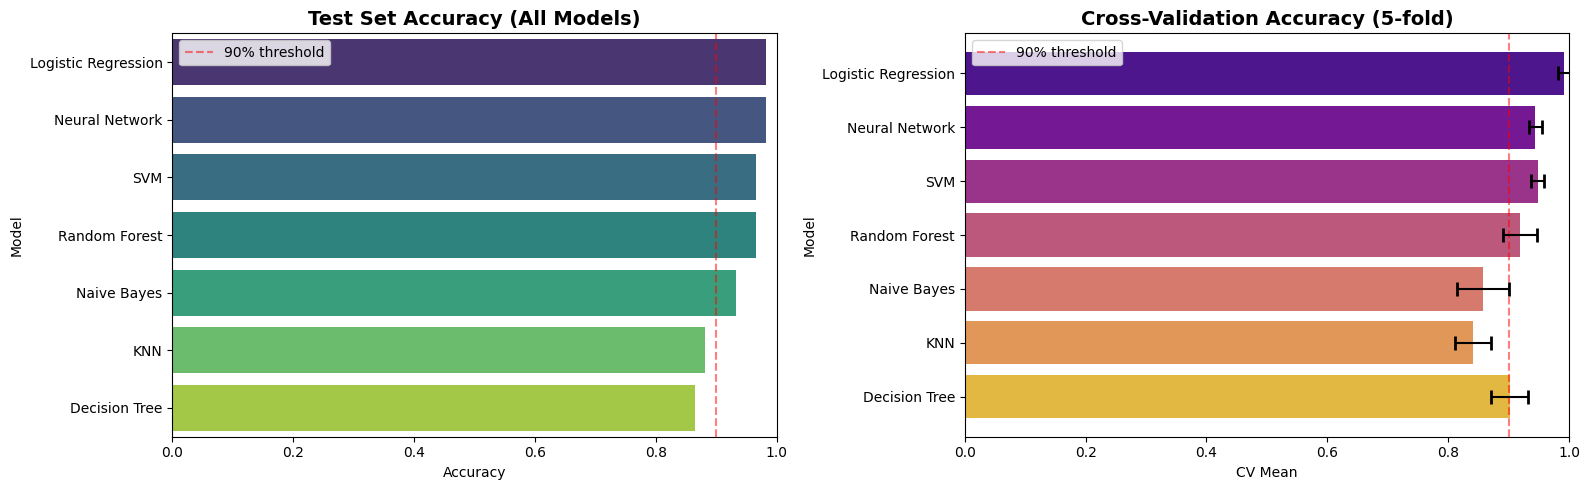


Comparison: Test Accuracy vs Cross-Validation
- Good models should have similar Test and CV accuracy
- Large difference indicates overfitting on test set
- Neural Network is included with other scaled models


In [7]:
# Create comparison visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Test Accuracy
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis", ax=axes[0])
axes[0].set_title("Test Set Accuracy (All Models)", fontsize=14, fontweight='bold')
axes[0].set_xlim(0, 1.0)
axes[0].axvline(x=0.9, color='red', linestyle='--', alpha=0.5, label='90% threshold')
axes[0].legend()

# Plot 2: Cross-Validation Accuracy with error bars
sns.barplot(x="CV Mean", y="Model", data=results_df, palette="plasma", ax=axes[1])
axes[1].set_title("Cross-Validation Accuracy (5-fold)", fontsize=14, fontweight='bold')
axes[1].set_xlim(0, 1.0)
axes[1].axvline(x=0.9, color='red', linestyle='--', alpha=0.5, label='90% threshold')

# Add error bars for CV std
for i, (idx, row) in enumerate(results_df.iterrows()):
    axes[1].errorbar(row['CV Mean'], i, xerr=row['CV Std'], 
                     fmt='none', c='black', capsize=5, capthick=2)

axes[1].legend()

plt.tight_layout()
plt.show()

print("\nComparison: Test Accuracy vs Cross-Validation")
print("- Good models should have similar Test and CV accuracy")
print("- Large difference indicates overfitting on test set")
print("- Neural Network is included with other scaled models")

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Store trained models for evaluation
trained_models = {}

# Re-train and store models for detailed metrics
print("="*80)
print("DETAILED PERFORMANCE METRICS")
print("="*80)

# Train scaled models
for name, model in models_scaled.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = {
        'model': model,
        'X_test': X_test_scaled,
        'needs_scaling': True
    }

# Train unscaled models
for name, model in models_unscaled.items():
    model.fit(X_train, y_train)
    trained_models[name] = {
        'model': model,
        'X_test': X_test,
        'needs_scaling': False
    }

# Print detailed metrics for each model
for name, model_info in trained_models.items():
    model = model_info['model']
    X_test_used = model_info['X_test']
    
    print("\n" + "="*80)
    print(f"{name.upper()}")
    print("="*80)
    
    # Predictions
    y_pred = model.predict(X_test_used)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print("\n📊 CONFUSION MATRIX:")
    print(f"                 Predicted NO  Predicted YES")
    print(f"  Actual NO         {tn:4d}         {fp:4d}")
    print(f"  Actual YES        {fn:4d}         {tp:4d}")
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Same as Sensitivity
    f1 = f1_score(y_test, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # ROC-AUC if available
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_used)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = "N/A"
    
    print(f"\n📈 PERFORMANCE METRICS:")
    print(f"  Accuracy:    {accuracy:.4f}  - Overall correctness")
    print(f"  Precision:   {precision:.4f}  - Of predicted YES, how many are correct")
    print(f"  Recall:      {recall:.4f}  - Of actual YES, how many detected (Sensitivity)")
    print(f"  F1-Score:    {f1:.4f}  - Harmonic mean of Precision & Recall")
    print(f"  Specificity: {specificity:.4f}  - Of actual NO, how many correctly identified")
    print(f"  ROC-AUC:     {roc_auc if isinstance(roc_auc, str) else f'{roc_auc:.4f}'}  - Overall discrimination ability")
    
    print(f"\n📋 CLASSIFICATION REPORT:")
    print(classification_report(y_test, y_pred, target_names=['NO (0)', 'YES (1)']))
    
    print(f"\n💡 INTERPRETATION:")
    if recall > 0.9:
        print(f"  ✅ High Recall ({recall:.2%}): Good at catching autism cases (few false negatives)")
    elif recall < 0.8:
        print(f"  ⚠️ Low Recall ({recall:.2%}): Missing some autism cases (many false negatives)")
    
    if precision > 0.9:
        print(f"  ✅ High Precision ({precision:.2%}): Few false alarms (low false positives)")
    elif precision < 0.8:
        print(f"  ⚠️ Low Precision ({precision:.2%}): Many false alarms (high false positives)")
    
    if specificity > 0.9:
        print(f"  ✅ High Specificity ({specificity:.2%}): Good at identifying non-autism cases")
    elif specificity < 0.8:
        print(f"  ⚠️ Low Specificity ({specificity:.2%}): Over-predicting autism cases")

print("\n" + "="*80)
print("METRICS SUMMARY COMPLETE")
print("="*80)


DETAILED PERFORMANCE METRICS

LOGISTIC REGRESSION

📊 CONFUSION MATRIX:
                 Predicted NO  Predicted YES
  Actual NO           30            1
  Actual YES           0           28

📈 PERFORMANCE METRICS:
  Accuracy:    0.9831  - Overall correctness
  Precision:   0.9655  - Of predicted YES, how many are correct
  Recall:      1.0000  - Of actual YES, how many detected (Sensitivity)
  F1-Score:    0.9825  - Harmonic mean of Precision & Recall
  Specificity: 0.9677  - Of actual NO, how many correctly identified
  ROC-AUC:     1.0000  - Overall discrimination ability

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      NO (0)       1.00      0.97      0.98        31
     YES (1)       0.97      1.00      0.98        28

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59


💡 INTERPRETATION:
  ✅ High Recall (100.00%): Good at catching a

# Confusion Matrix Visualization for All Models


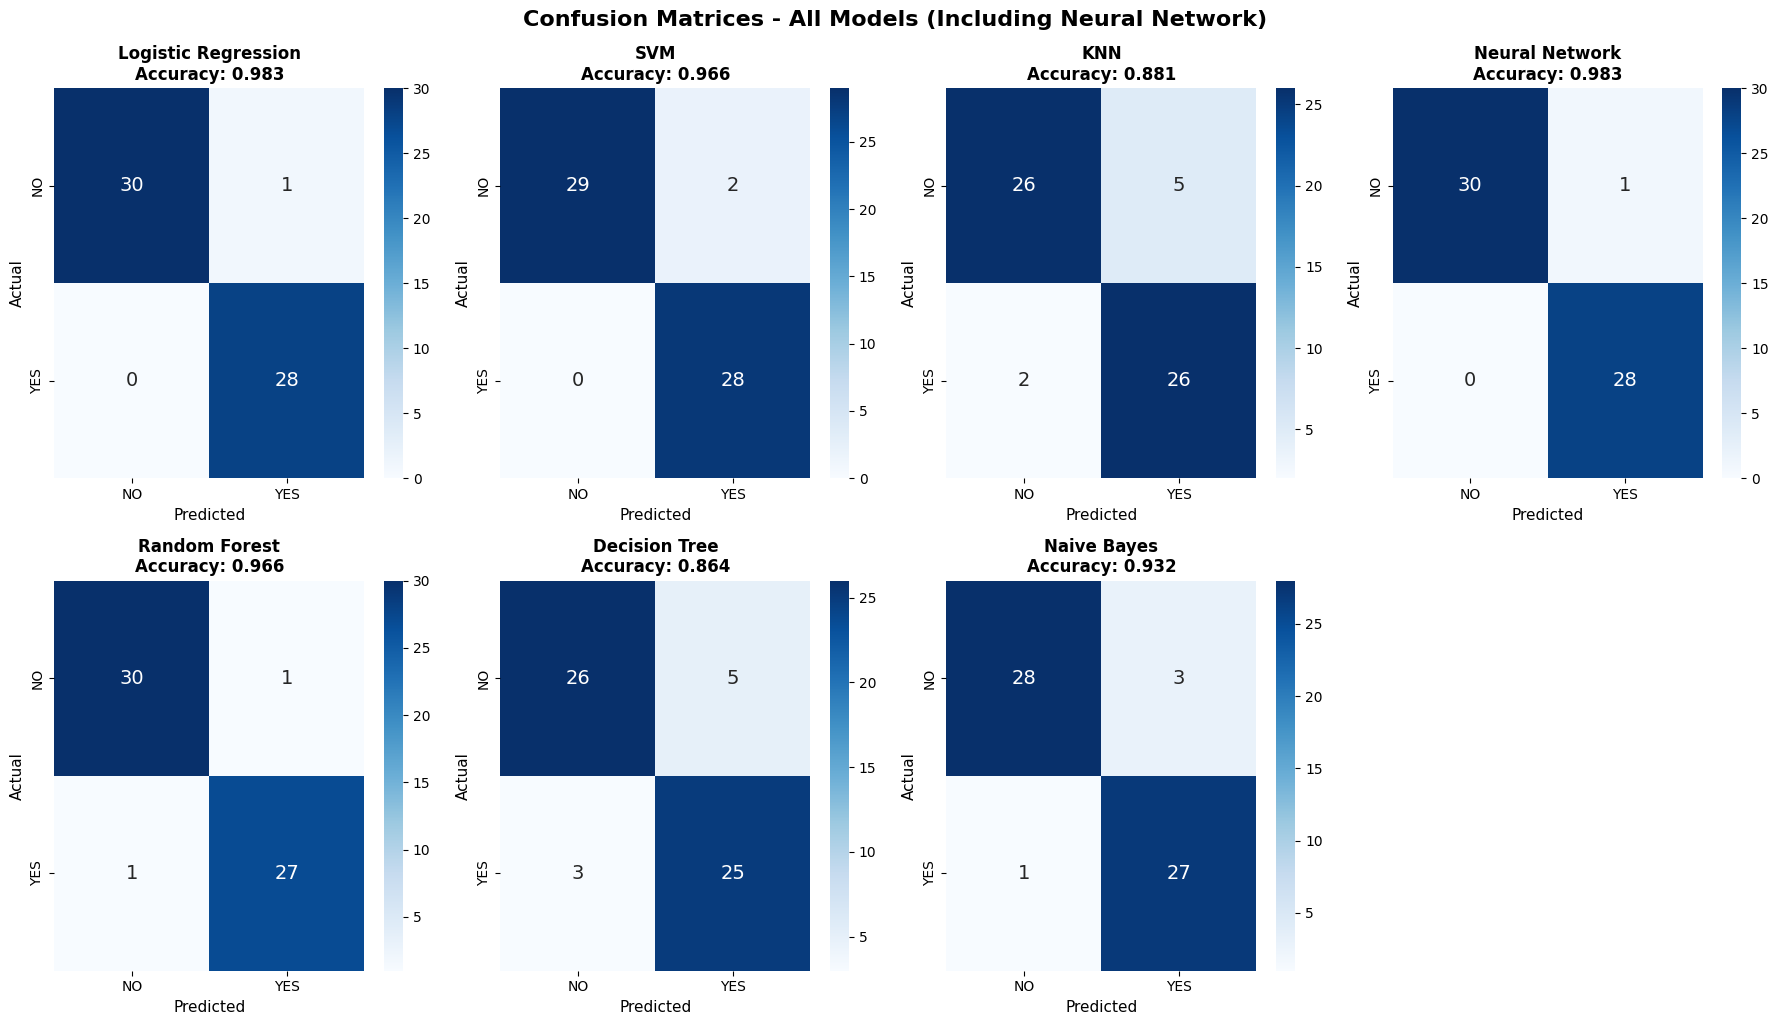


How to Read Confusion Matrix:
  - Top-Left (TN): Correctly predicted NO autism
  - Top-Right (FP): Incorrectly predicted YES (False Alarm)
  - Bottom-Left (FN): Incorrectly predicted NO (Missed Case)
  - Bottom-Right (TP): Correctly predicted YES autism


In [9]:
# Visualize confusion matrices for all models
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.ravel()

for idx, (name, model_info) in enumerate(trained_models.items()):
    model = model_info['model']
    X_test_used = model_info['X_test']
    
    # Get predictions and confusion matrix
    y_pred = model.predict(X_test_used)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix as heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['NO', 'YES'], 
                yticklabels=['NO', 'YES'],
                ax=axes[idx], cbar=True, annot_kws={"size": 14})
    
    axes[idx].set_title(f'{name}\nAccuracy: {accuracy_score(y_test, y_pred):.3f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=11)
    axes[idx].set_xlabel('Predicted', fontsize=11)

# Hide the extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.suptitle('Confusion Matrices - All Models (Including Neural Network)', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\nHow to Read Confusion Matrix:")
print("  - Top-Left (TN): Correctly predicted NO autism")
print("  - Top-Right (FP): Incorrectly predicted YES (False Alarm)")
print("  - Bottom-Left (FN): Incorrectly predicted NO (Missed Case)")
print("  - Bottom-Right (TP): Correctly predicted YES autism")

# Comprehensive Metrics Comparison Table


In [10]:
# Create comprehensive comparison table with all metrics
all_metrics = []

for name, model_info in trained_models.items():
    model = model_info['model']
    X_test_used = model_info['X_test']
    
    # Predictions
    y_pred = model.predict(X_test_used)
    
    # Confusion Matrix values
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate all metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_used)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = 0
    
    all_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Specificity': specificity,
        'ROC-AUC': roc_auc,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn
    })

# Create DataFrame and sort by F1-Score (balanced metric)
metrics_df = pd.DataFrame(all_metrics).sort_values(by='F1-Score', ascending=False)

print("="*100)
print("COMPREHENSIVE METRICS COMPARISON - ALL MODELS")
print("="*100)
print("\n📊 Performance Metrics:")
print(metrics_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity', 'ROC-AUC']].to_string(index=False))

print("\n\n📋 Confusion Matrix Values:")
print(metrics_df[['Model', 'TP', 'TN', 'FP', 'FN']].to_string(index=False))

print("\n" + "="*100)
print("BEST MODEL RECOMMENDATIONS")
print("="*100)

# Find best models for different criteria
best_accuracy = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
best_f1 = metrics_df.loc[metrics_df['F1-Score'].idxmax()]
best_recall = metrics_df.loc[metrics_df['Recall'].idxmax()]
best_precision = metrics_df.loc[metrics_df['Precision'].idxmax()]

print(f"\n🏆 Best Overall (F1-Score): {best_f1['Model']} ({best_f1['F1-Score']:.4f})")
print(f"   - Balanced performance between precision and recall")

print(f"\n🎯 Best Accuracy: {best_accuracy['Model']} ({best_accuracy['Accuracy']:.4f})")
print(f"   - Highest overall correctness")

print(f"\n🔍 Best Recall (Sensitivity): {best_recall['Model']} ({best_recall['Recall']:.4f})")
print(f"   - Best at catching autism cases (minimizes missed diagnoses)")
print(f"   - Use when: Missing a case is worse than false alarms")

print(f"\n✅ Best Precision: {best_precision['Model']} ({best_precision['Precision']:.4f})")
print(f"   - Fewest false alarms")
print(f"   - Use when: False alarms are costly")

print("\n" + "="*100)


COMPREHENSIVE METRICS COMPARISON - ALL MODELS

📊 Performance Metrics:
              Model  Accuracy  Precision   Recall  F1-Score  Specificity  ROC-AUC
Logistic Regression  0.983051   0.965517 1.000000  0.982456     0.967742 1.000000
     Neural Network  0.983051   0.965517 1.000000  0.982456     0.967742 1.000000
                SVM  0.966102   0.933333 1.000000  0.965517     0.935484 0.998848
      Random Forest  0.966102   0.964286 0.964286  0.964286     0.967742 0.990783
        Naive Bayes  0.932203   0.900000 0.964286  0.931034     0.903226 0.976959
                KNN  0.881356   0.838710 0.928571  0.881356     0.838710 0.972926
      Decision Tree  0.864407   0.833333 0.892857  0.862069     0.838710 0.865783


📋 Confusion Matrix Values:
              Model  TP  TN  FP  FN
Logistic Regression  28  30   1   0
     Neural Network  28  30   1   0
                SVM  28  29   2   0
      Random Forest  27  30   1   1
        Naive Bayes  27  28   3   1
                KNN  26  26  

In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
import time

print("="*100)
print("HYPERPARAMETER TUNING - TOP 4 MODELS")
print("="*100)

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced'],
        'max_iter': [1000, 2000]
    },
    
    "SVM": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'class_weight': [None, 'balanced'],
        'degree': [2, 3, 4]  # Only used for poly kernel
    },
    
    "Decision Tree": {
        'max_depth': [3, 5, 7, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'criterion': ['gini', 'entropy'],
        'class_weight': [None, 'balanced'],
        'max_features': ['sqrt', 'log2', None]
    },
    
    "Neural Network": {
        'hidden_layer_sizes': [(16, 8), (32, 16), (64, 32), (16, 8, 4), (32, 16, 8)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [500, 1000]
    }
}

# Initialize models
models_to_tune = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42)
}

# Store tuning results
tuning_results = {}

# Perform Grid Search for each model
for name, model in models_to_tune.items():
    print(f"\n{'='*100}")
    print(f"Tuning {name}...")
    print(f"{'='*100}")
    
    # Determine which data to use (scaled or unscaled)
    if name in ["Logistic Regression", "SVM", "Neural Network"]:
        X_train_used = X_train_scaled
        X_test_used = X_test_scaled
        print(f"Using SCALED data")
    else:
        X_train_used = X_train
        X_test_used = X_test
        print(f"Using UNSCALED data")
    
    # GridSearchCV with F1-score as metric (better for imbalanced data)
    start_time = time.time()
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        scoring='f1',  # Use F1-score for medical diagnosis
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )
    
    # Fit grid search
    grid_search.fit(X_train_used, y_train)
    
    elapsed_time = time.time() - start_time
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Evaluate on test set
    y_pred = best_model.predict(X_test_used)
    y_prob = best_model.predict_proba(X_test_used)[:, 1]
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_roc_auc = roc_auc_score(y_test, y_prob)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Store results
    tuning_results[name] = {
        'best_model': best_model,
        'best_params': grid_search.best_params_,
        'best_cv_score': grid_search.best_score_,
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_roc_auc': test_roc_auc,
        'cv_results': grid_search.cv_results_,
        'time_taken': elapsed_time,
        'confusion_matrix': cm
    }
    
    # Print results
    print(f"\nTuning Complete in {elapsed_time:.2f} seconds")
    print(f"\nBest Parameters:")
    for param, value in grid_search.best_params_.items():
        print(f"   {param}: {value}")
    
    print(f"\nPerformance Metrics:")
    print(f"   Best CV F1-Score:  {grid_search.best_score_:.4f}")
    print(f"   Test Accuracy:     {test_accuracy:.4f}")
    print(f"   Test F1-Score:     {test_f1:.4f}")
    print(f"   Test Precision:    {test_precision:.4f}")
    print(f"   Test Recall:       {test_recall:.4f}")
    print(f"   Test ROC-AUC:      {test_roc_auc:.4f}")
    
    print(f"\nConfusion Matrix:")
    print(f"                 Predicted NO  Predicted YES")
    print(f"  Actual NO         {tn:4d}         {fp:4d}")
    print(f"  Actual YES        {fn:4d}         {tp:4d}")

print("\n" + "="*100)
print("HYPERPARAMETER TUNING COMPLETE")
print("="*100)
print("\nNeural Network Note:")
print("- Tuned hidden layer sizes, activation functions, solvers, and learning rates")
print("- May take longer to train than simpler models")
print("- Performance should be competitive but with less interpretability")

HYPERPARAMETER TUNING - TOP 4 MODELS

Tuning Logistic Regression...
Using SCALED data
Fitting 5 folds for each of 96 candidates, totalling 480 fits


d:\Labs\ML\ML Project\ChildhoodAutismRiskPrediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
d:\Labs\ML\ML Project\ChildhoodAutismRiskPrediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(



Tuning Complete in 28.96 seconds

Best Parameters:
   C: 1
   class_weight: None
   max_iter: 1000
   penalty: l1
   solver: saga

Performance Metrics:
   Best CV F1-Score:  1.0000
   Test Accuracy:     0.9831
   Test F1-Score:     0.9825
   Test Precision:    0.9655
   Test Recall:       1.0000
   Test ROC-AUC:      1.0000

Confusion Matrix:
                 Predicted NO  Predicted YES
  Actual NO           30            1
  Actual YES           0           28

Tuning SVM...
Using SCALED data
Fitting 5 folds for each of 360 candidates, totalling 1800 fits

Tuning Complete in 32.42 seconds

Best Parameters:
   C: 1
   class_weight: None
   degree: 2
   gamma: scale
   kernel: linear

Performance Metrics:
   Best CV F1-Score:  1.0000
   Test Accuracy:     1.0000
   Test F1-Score:     1.0000
   Test Precision:    1.0000
   Test Recall:       1.0000
   Test ROC-AUC:      1.0000

Confusion Matrix:
                 Predicted NO  Predicted YES
  Actual NO           31            0
  Actual 